<br><font face = "Times New Roman" size = "4"> <b>Name: Sankul Pandey  DS0722
<br><font face = "Times New Roman" size = "4"> <b>Email: sankul99@gmail.com
    
    
    
    
    


<br><font face = "Muller Text" size = "8"> <b> Baseball Case Study
    
    
    
    

<br><font face = "TImes New Roman" size = "4"> <b> Problem Statement
    
    

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an 
algorithm that predicts the number of wins for a given team in the 2015 season based on 
several different indicators of success. There are 16 different features that will be used as the 
inputs to the machine learning and the output will be a value that represents the number of 
wins. 


-- Input features: Runs, At Bats, Doubles , Triples, Homruns, Walks, Strikeouts, Stolen Bases, Runs Allowed , Earned Runs , Earned Run Average ( ERA ), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)


To understand the columns meaning, follow the link given below to understand the baseball 
statistics: https://en.wikipedia.org/wiki/Baseball_statistics


For downloading the dataset, use the link given below. Dataset Link-
 https://github.com/dsrscientist/Data-Science-ML-CapstoneProjects/blob/master/baseball.csv


## 1) Importing all the required libraries 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 2) Importing the dataset 

In [4]:
df = pd.read_csv('baseball.csv')
#now to read the data 

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## 3) Data Type

In [5]:


df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
df.shape

(30, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## 4) Checking for null values 


In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

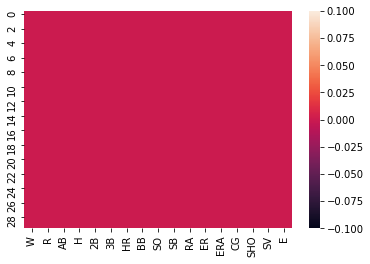

In [9]:
#using heatmap to confirm presence of no null values 

sns.heatmap(df.isnull())

### There are no null values in the data set which will help in our analysis 

## 5) Checking for Duplicates in the data 

In [10]:
dupli = df[df.duplicated()]
print(" Duplicate Rows if any")



 Duplicate Rows if any


In [11]:
#Hence there are no duplicates 

dupli

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


### Data set has no duplicates 

## 6) Statistical analysis of the data 

### But before that it's important to know what each column means 

In [12]:
df.columns 

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

!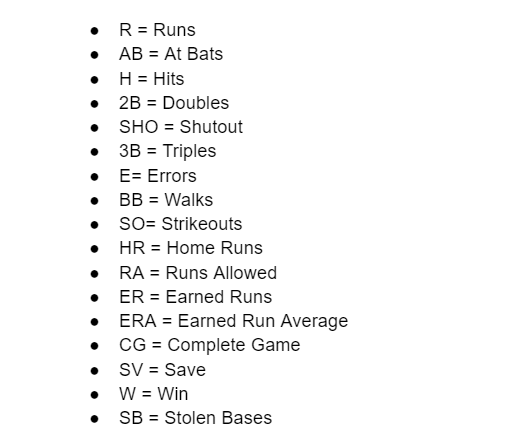

## 7) EDA or Data Visualization 

<AxesSubplot:>

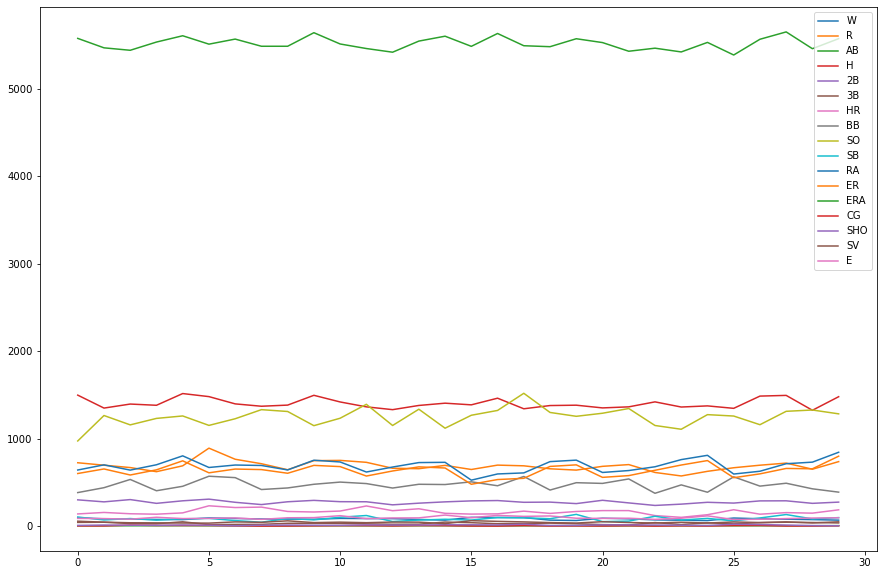

In [13]:
df.plot.line(figsize=(15,10))

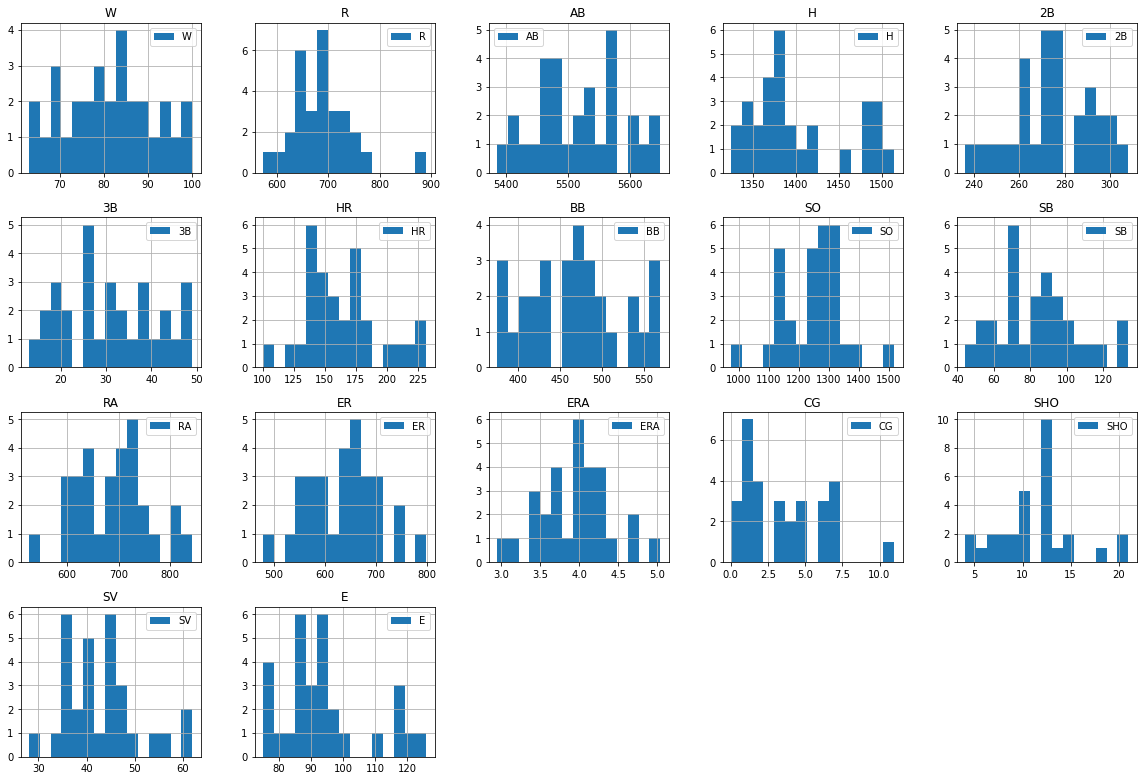

In [14]:
df.hist(figsize=(20,35),layout=(10,5),bins=15,legend=True)
plt.show()

### The relationship between Runs and wins is highly correlated. Let's check this 

<AxesSubplot:xlabel='W', ylabel='R'>

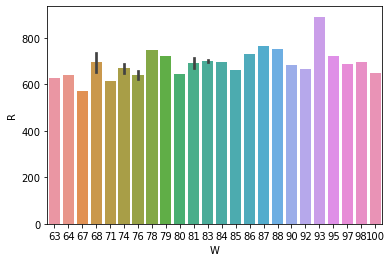

In [15]:
sns.barplot(data = df, x= "W", y= "R")

<AxesSubplot:xlabel='W', ylabel='R'>

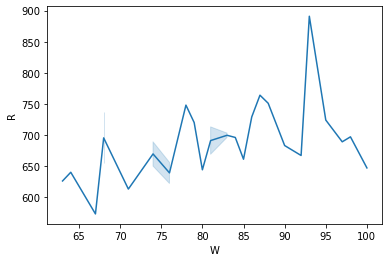

In [16]:
sns.lineplot(data =df , x="W", y= "R")

<br><font face = "Roboto" size = "2"> <b> We can see that when the runs increase the amount of wins also increase. 900 here is the highest amount of run that is scored

In [17]:
def VIZ(df,i):
    plt.figure(figsize=(25,10),facecolor = 'pink')
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y='W',data=df)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df)
    plt.show()

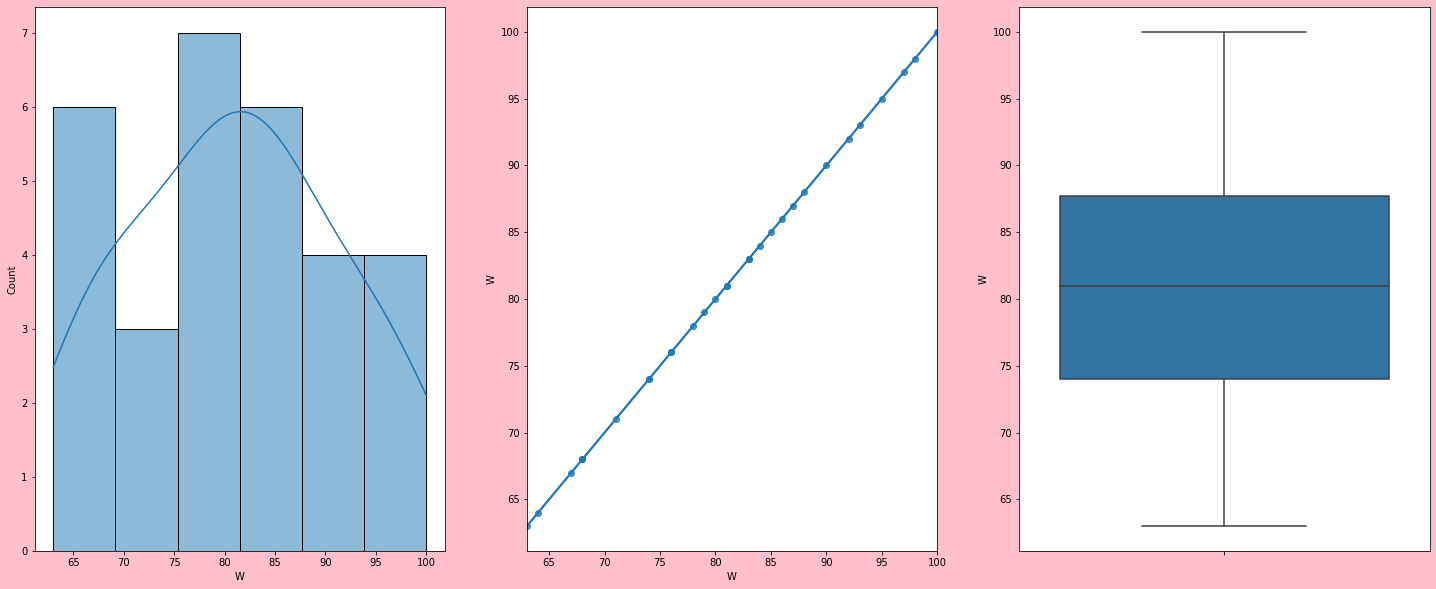

In [18]:
VIZ(df,'W')

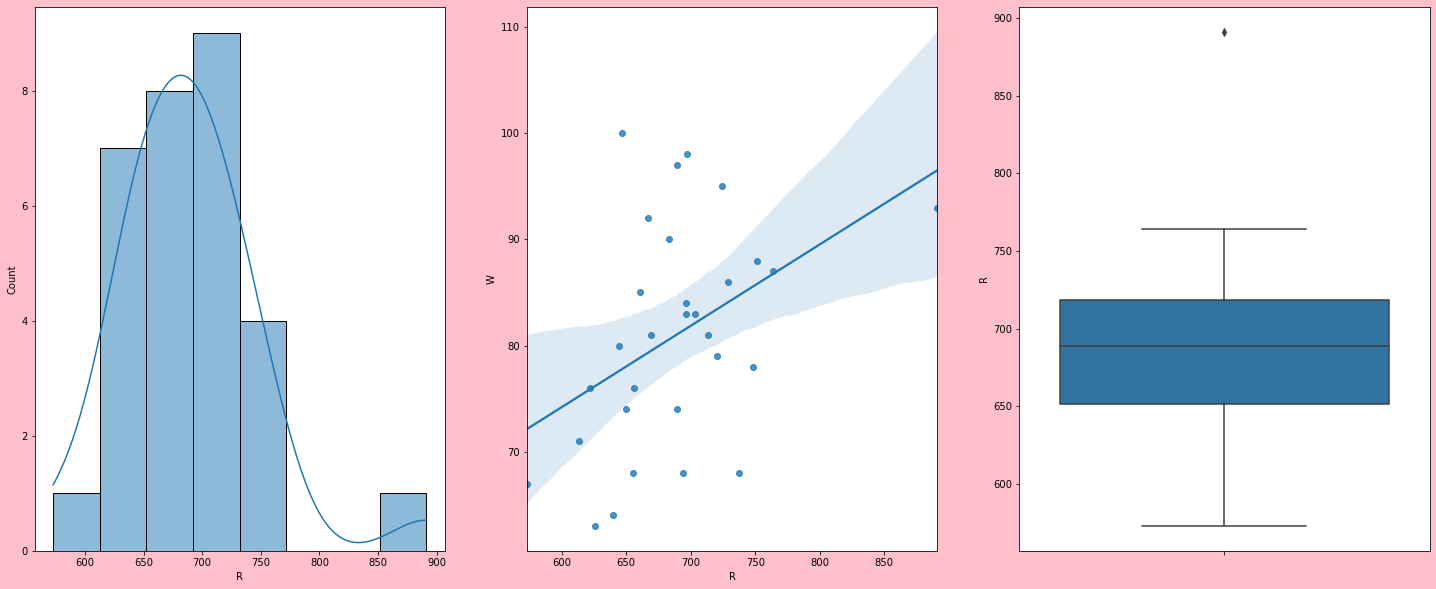

In [19]:
VIZ(df,'R')

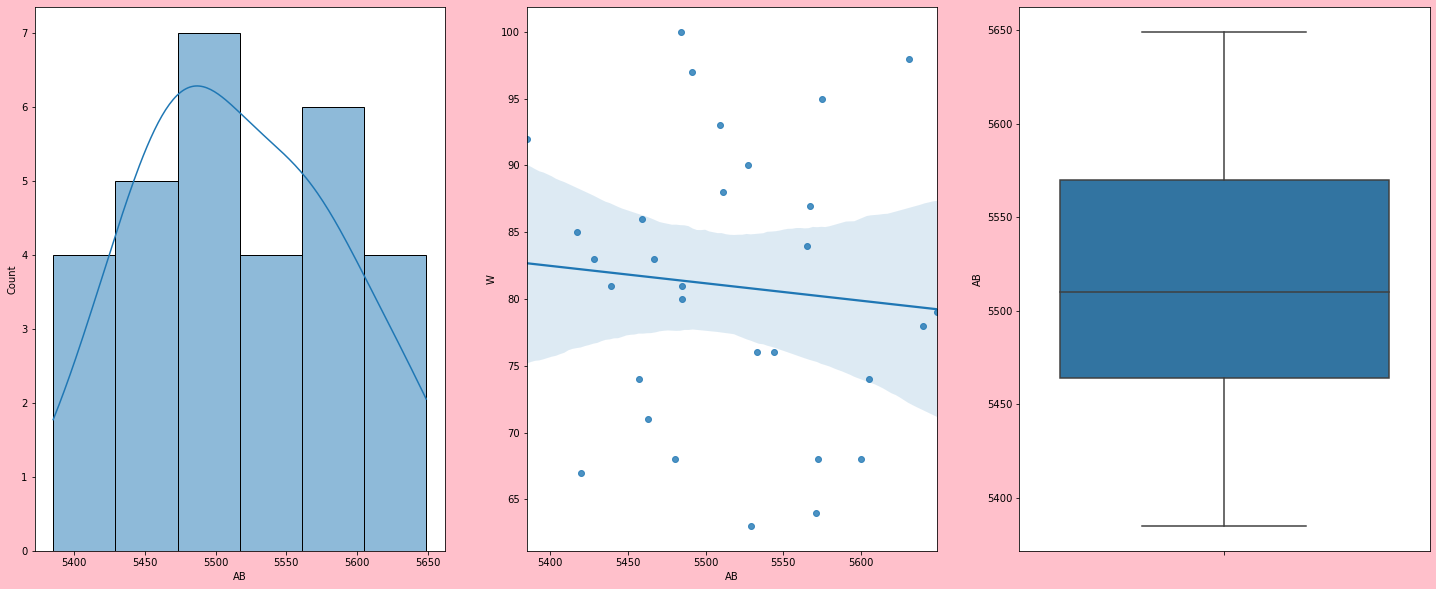

In [20]:
VIZ(df,'AB')

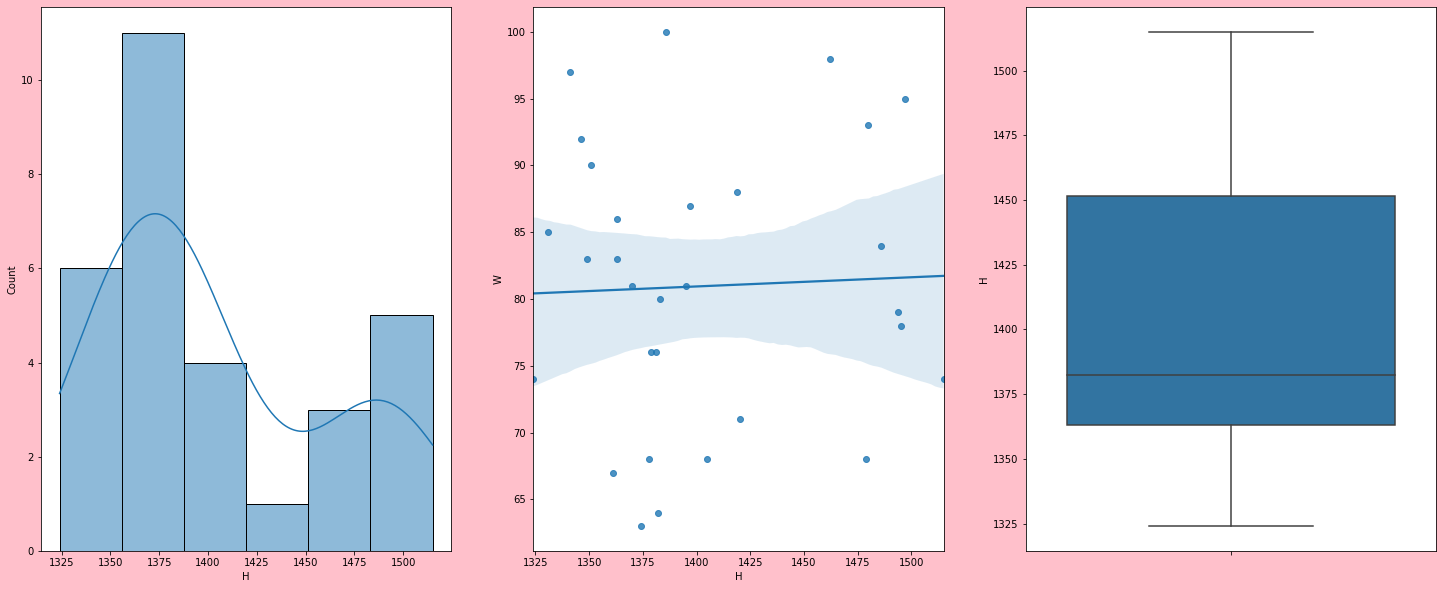

In [21]:
VIZ(df,'H')

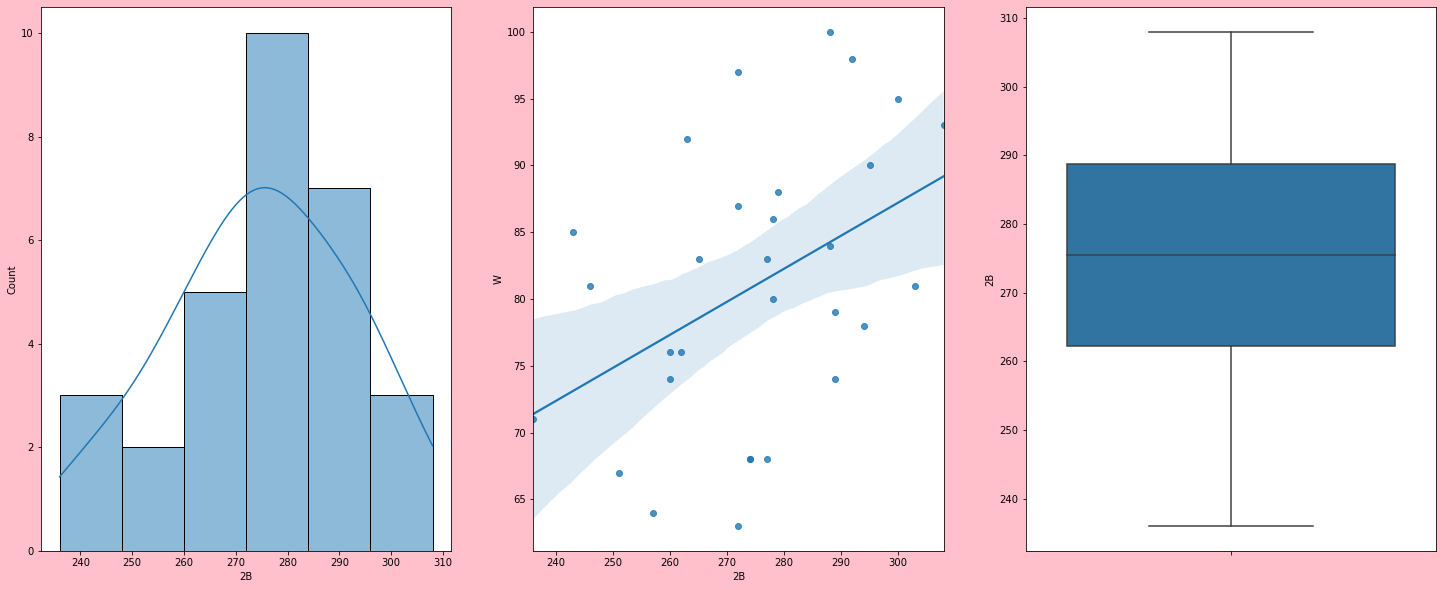

In [22]:
VIZ(df,'2B')

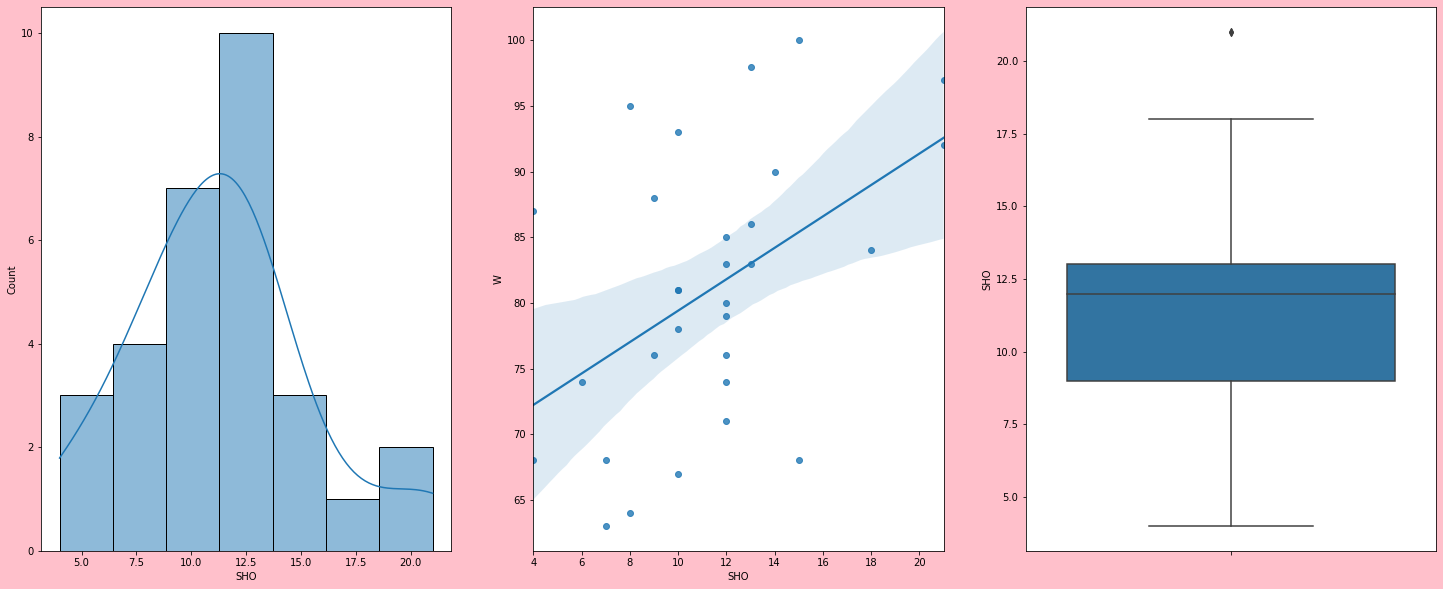

In [23]:
VIZ(df,'SHO')

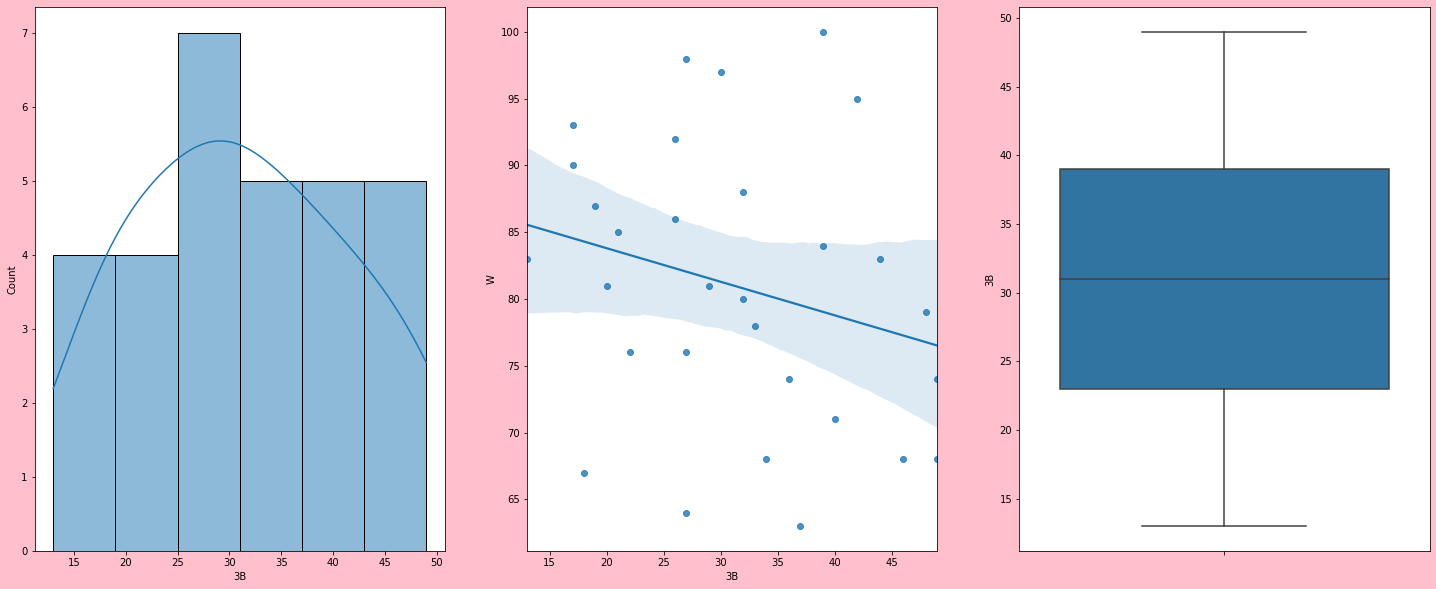

In [24]:
VIZ(df,'3B')

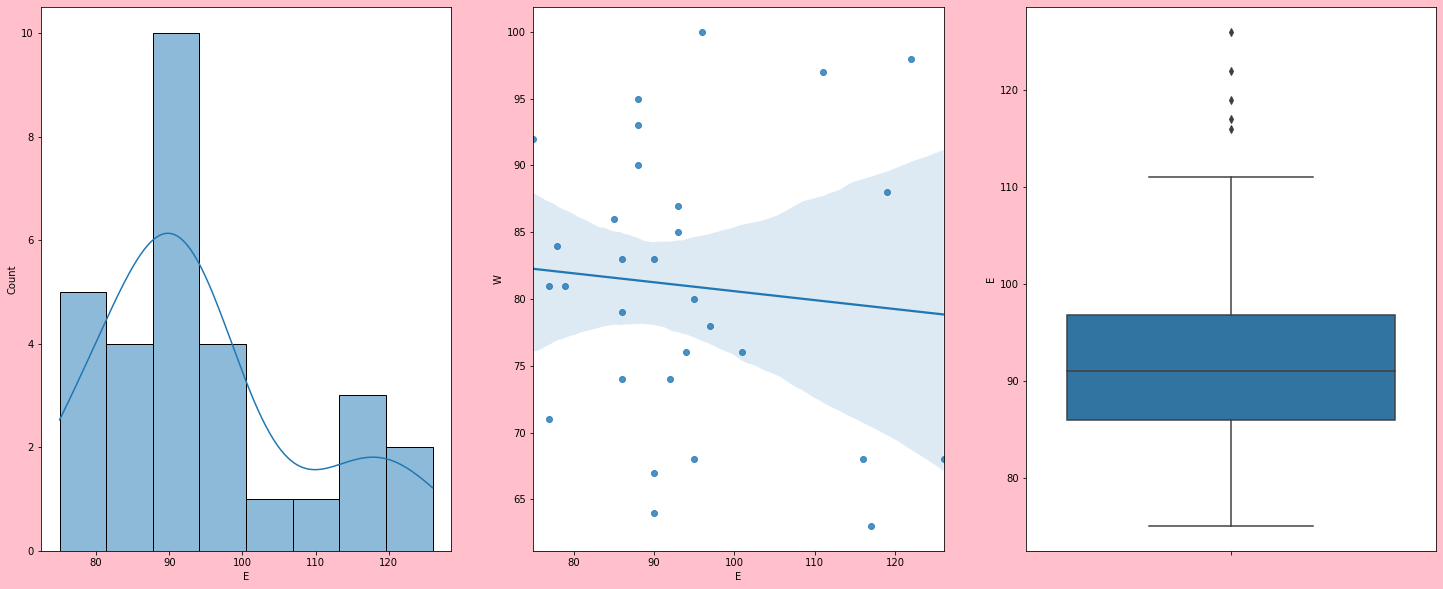

In [25]:
VIZ(df,'E')

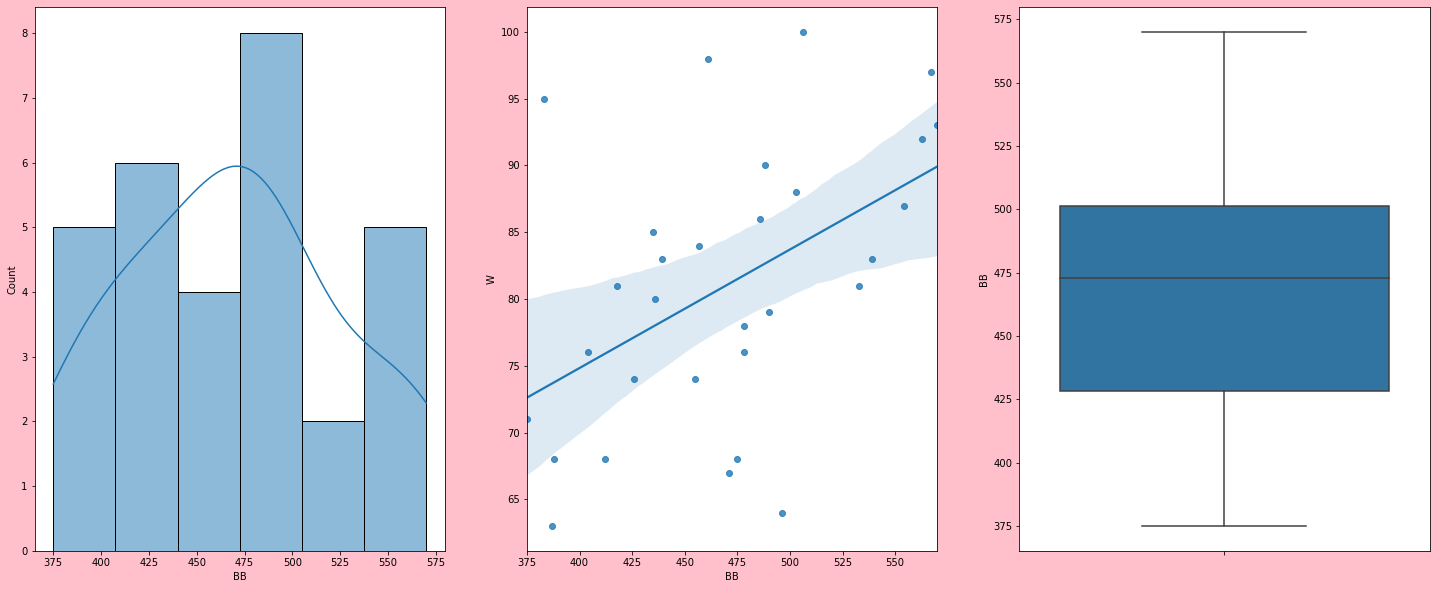

In [26]:
VIZ(df,'BB')

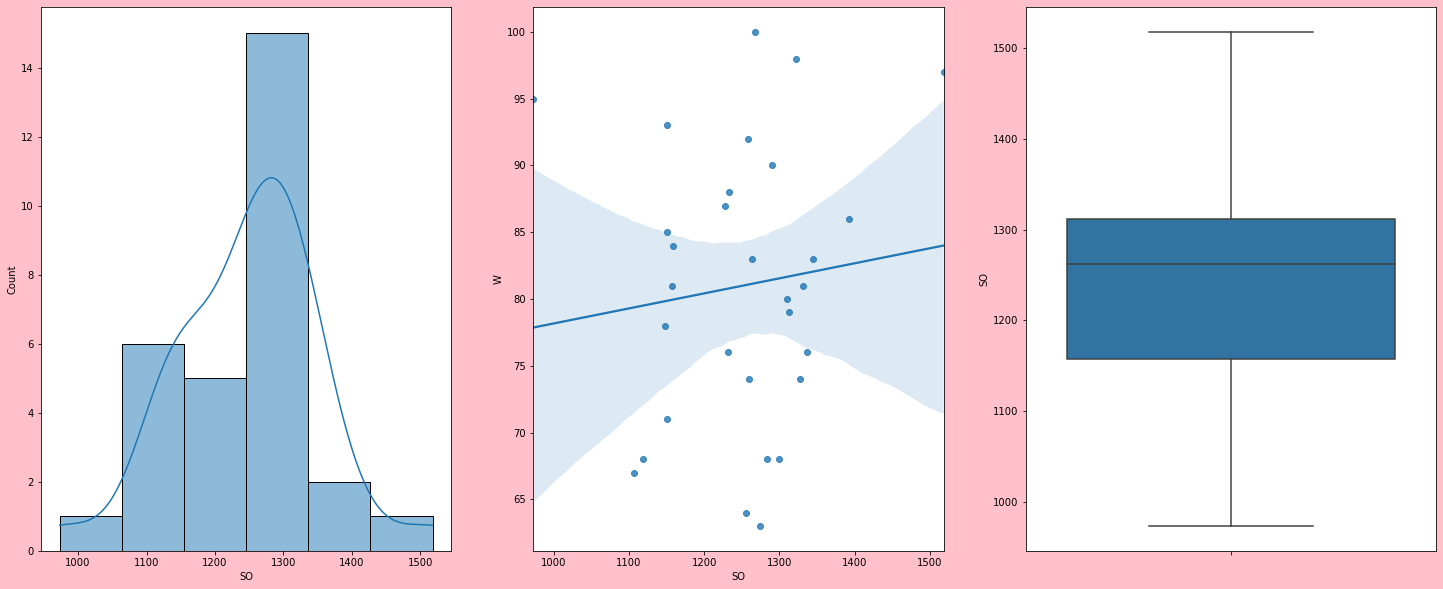

In [27]:
VIZ(df,'SO')

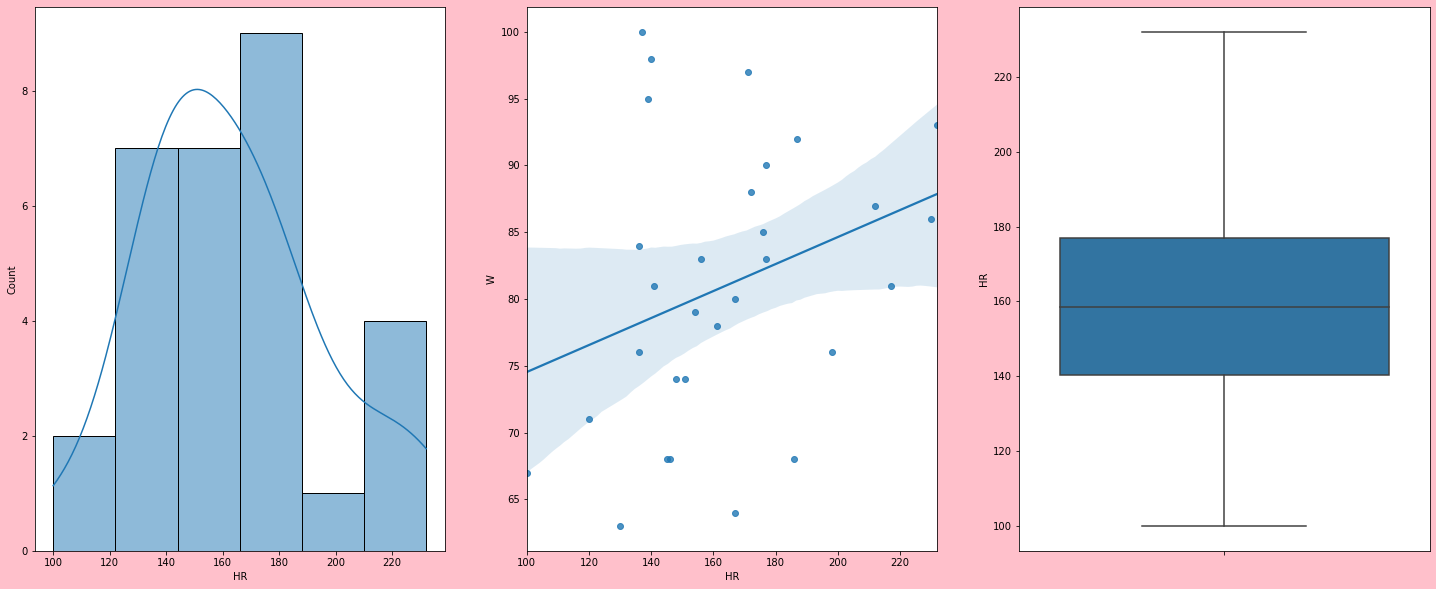

In [28]:
VIZ(df,'HR')

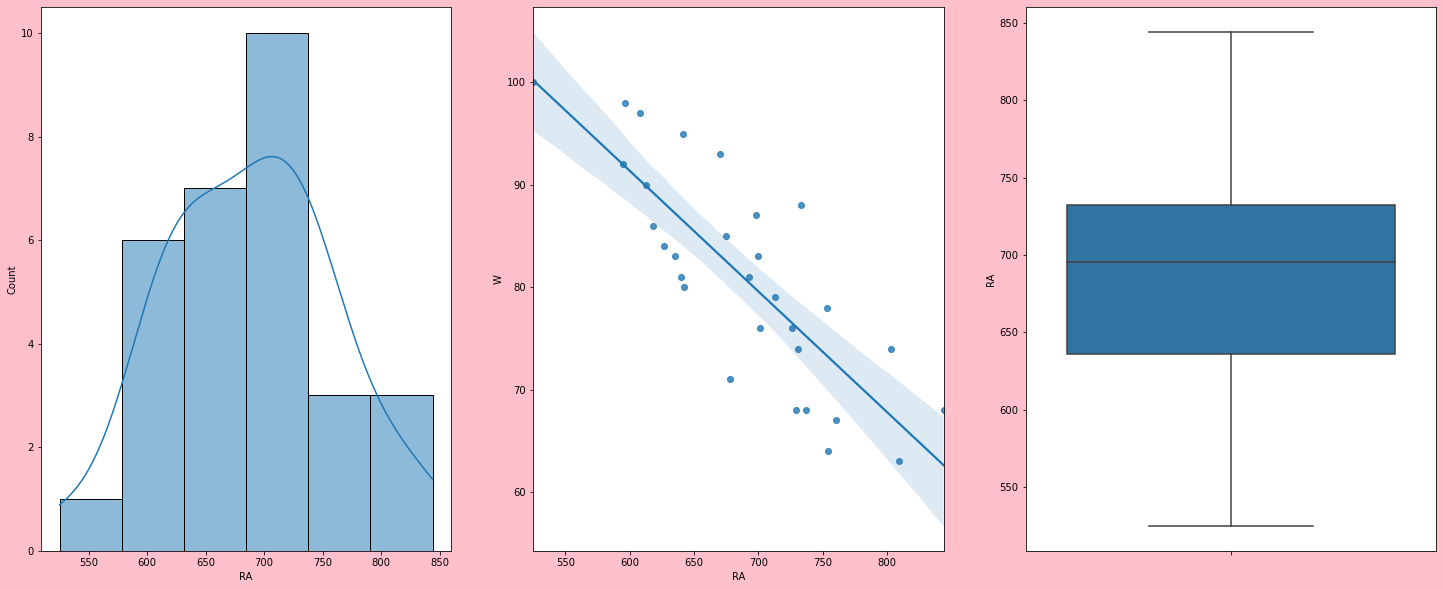

In [29]:
VIZ(df,'RA')

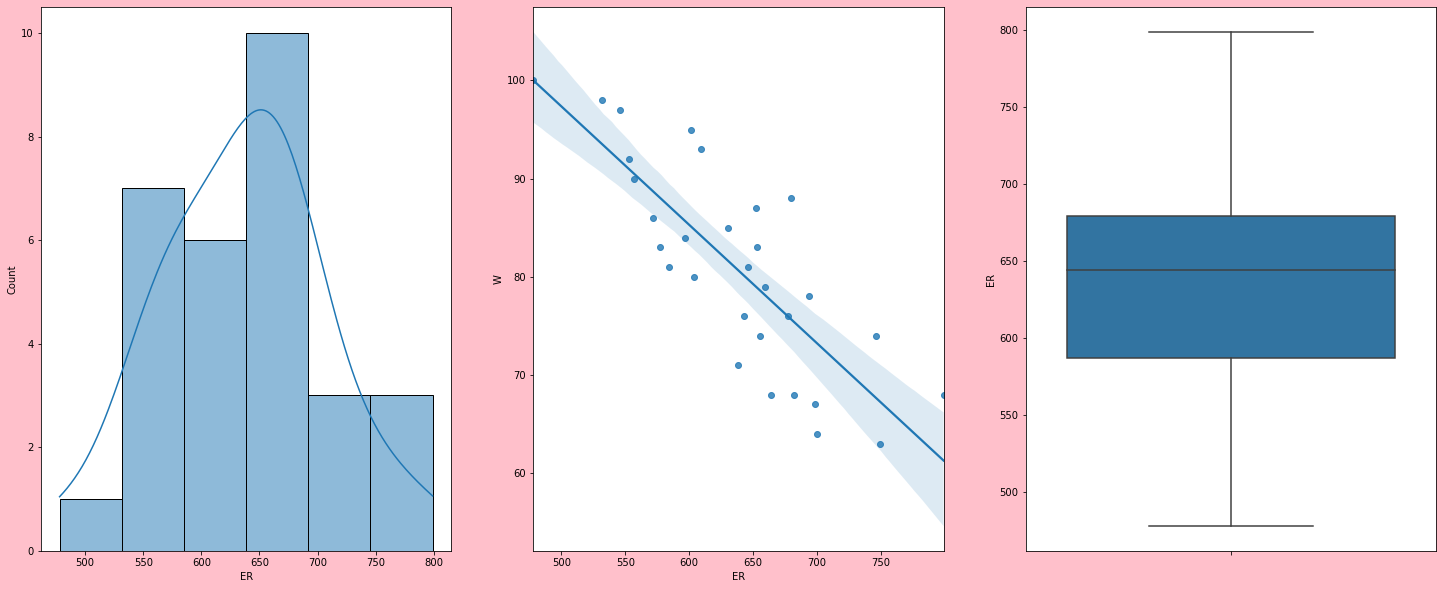

In [30]:
VIZ(df,'ER')

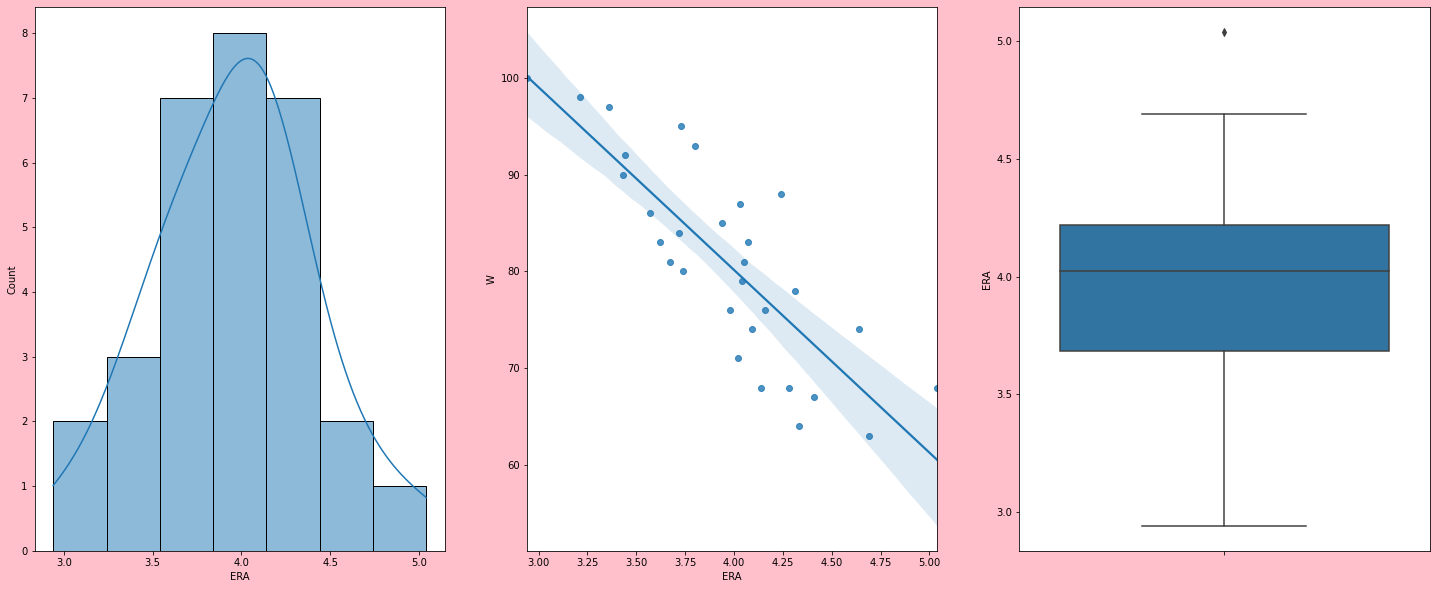

In [31]:
VIZ(df,'ERA')

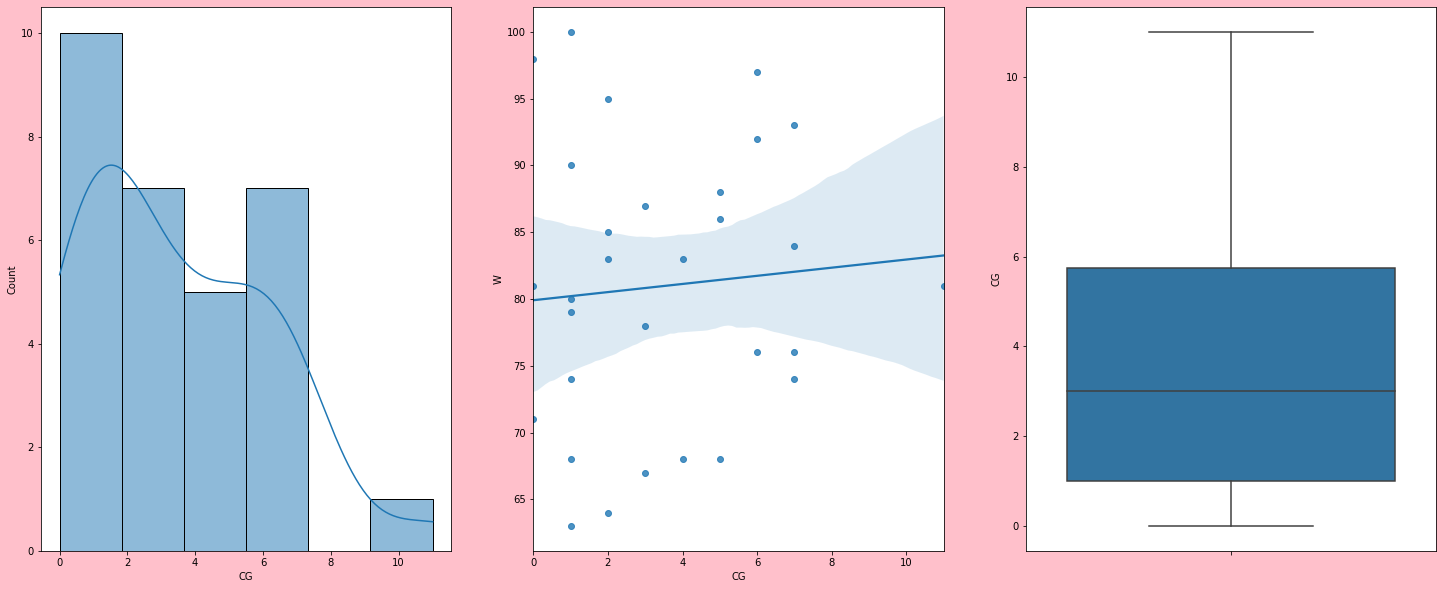

In [32]:
VIZ(df,'CG')

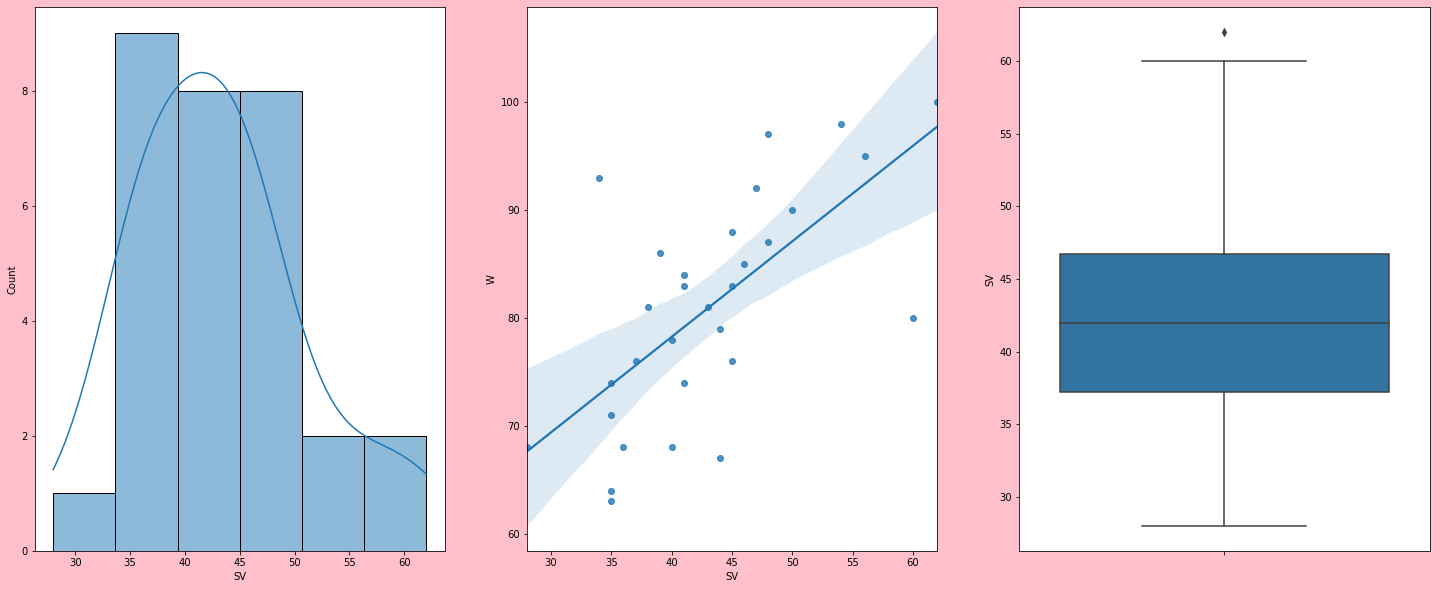

In [33]:
VIZ(df,'SV')

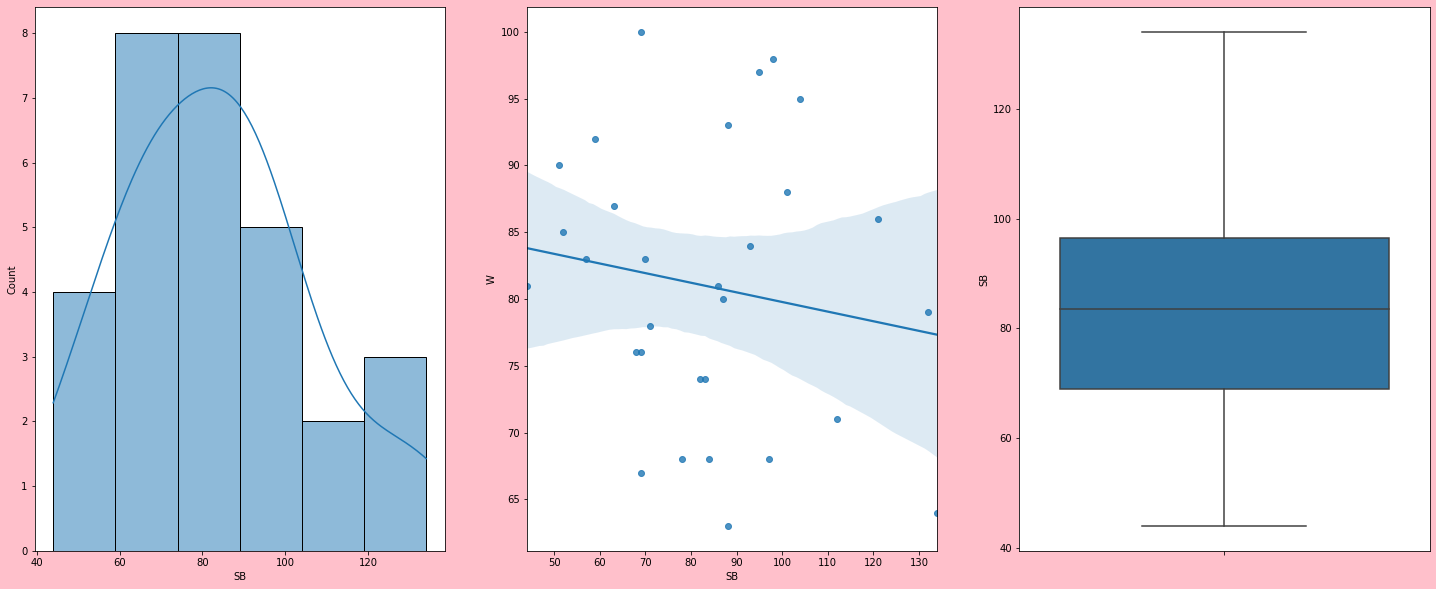

In [34]:
VIZ(df,'SB')

It is visible from the above data that 

A) amount of runs, doubles, triples, home runs , shut downs etc are highly possitively in 
   correlation with each other 
   
   
B) Whereas Earned runs, runs allowed, bases stolen etc are negatively related



<font face = "Roboto" size = "5"> <b>Outlier treatment 

Certain data in the above depiction are at the extremes which in
conclusion hinders with the analysis of the data. The model tries fitting the data at the extremes and 
in turn the importance that should be given to the main cluster of data is not given. these are commonly known as outliers and removed for
better analysis of the data. 

Outliers can be removed by multiple methods but two of them are mostly used,

1. Z-score 
2. IQR 

<font face = "Roboto" size = "5"> <b>Standardization 



this is when the data distribution is brought to a certain normal distribution 
standard. this is done by removing the skewness of the data. ( Skewness is the assymetery that is in the data)
there are multiple methods to remove this skewness such as Log transformation, Sqaure root, Cube root, Power Transformation etc 

## 8) Removing the outliers using Zscore 

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage loss of data by zscore is : 0.03333333333333333


In [36]:
fe = df1.drop('W', axis = 1)
la = df1.W

## 9) Data scaling using Standard Scaler 

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feature = scaler.fit_transform (fe)

In [38]:
scaled_feature.shape

(29, 16)

In [39]:
fe.shape

(29, 16)

## 10) Multicollinearity 

In [40]:
As the name suggest it is when multiple individual characteristic are related to each other 


SyntaxError: invalid syntax (<ipython-input-40-aff91a45bff4>, line 1)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column 
#It tells us how milti linked cariance in each column is 
varif = pd.DataFrame()
varif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
varif["Features"] = fe.columns
#vif must be done after scaling the data 
#Let's check the values
varif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<AxesSubplot:>

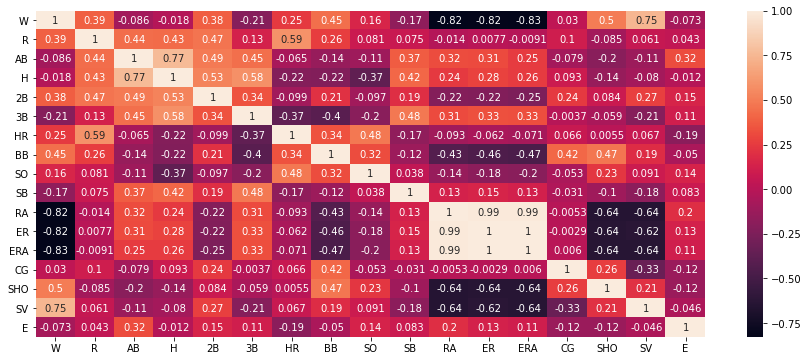

In [42]:
#checking for correlation
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

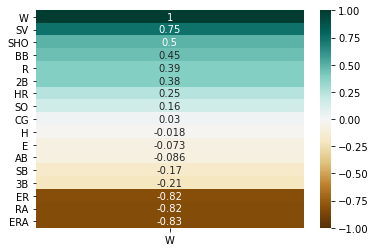

In [43]:
sns.heatmap(df1.corr()[['W']].sort_values(by='W',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG')

# 11) Selection of highly correlated features 

In [44]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [46]:
corr_features

#these features are highly correlated to each other 

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

In [47]:
#correlation with target 
 
df1.corr()['W'].sort_values()

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with target variable'}>

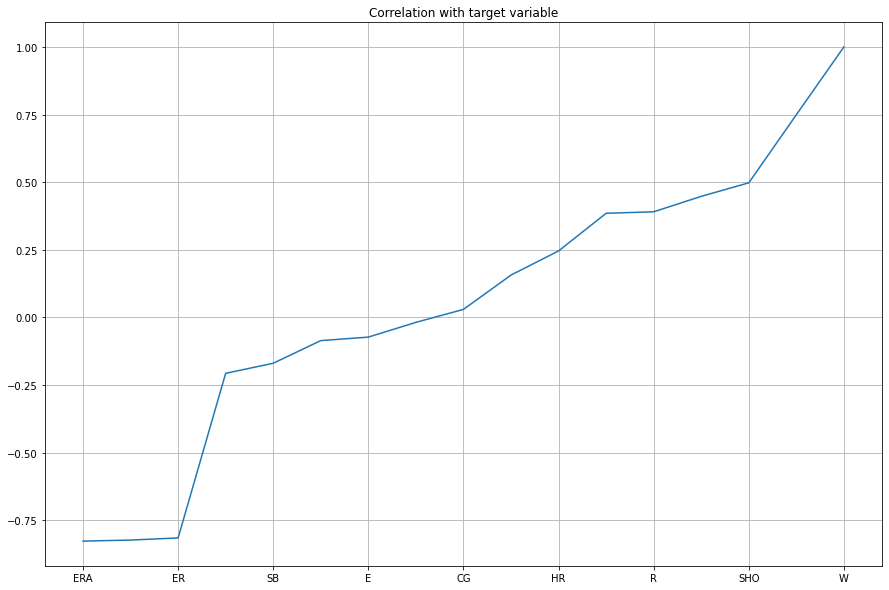

In [48]:
#Graphical represenation of the multicollinearity 

df1.corr()['W'].sort_values().plot(kind='line',grid=True,figsize=(15,10),title='Correlation with target variable') 

<AxesSubplot:title={'center':'Correlation with target variable'}>

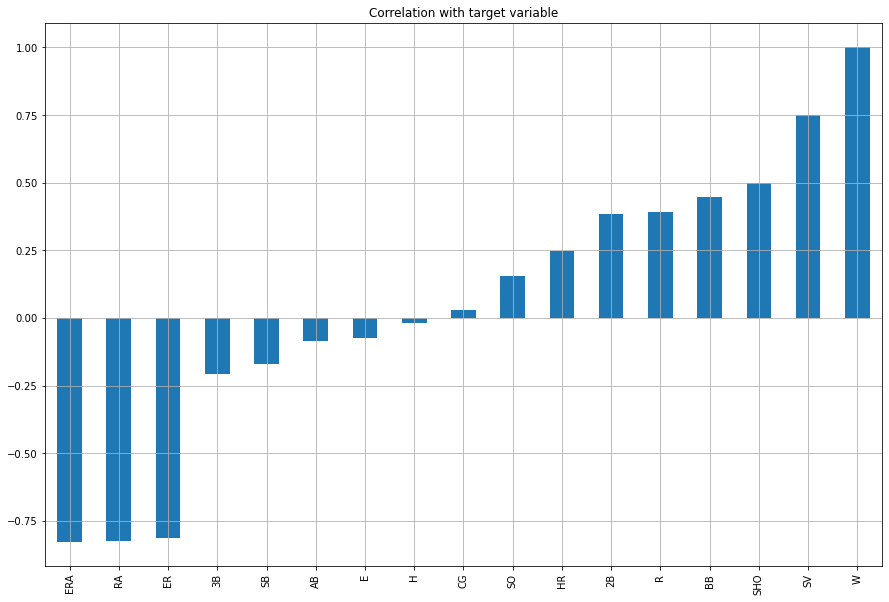

In [49]:
#Bar representation gives us a better insight than line plot 

df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(15,10),title='Correlation with target variable') 

<font face = "Times New Roman" size = "4"> <b> Feature Selection Techniques<br></b>

Feature selection is an extremely important step next because here only the
the best columns that are extremely important and are rlated to the target variable 
are taken and the rest are removed. This in truth aids our analysis 

Scatter plot, box plot etc helps in visual represenation of this realtionship

Statistical representation is done using Correlation matrix, Chi squared test and etc 

In [50]:
X = df1.drop(columns=['W','AB', 'H', '3B', 'SO', 'SB', 'RA' , 'ER', 'CG', 'E'], axis=1)

y = df1.W

In [51]:
varif = pd.DataFrame()
varif['vif'] = [variance_inflation_factor (scaled_feature, i ) for i in range (scaled_feature.shape[1])]
varif['Features'] = fe.columns

varif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


## 12) Machine learning modeling using multiple models 

In [80]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier

In [53]:
#Now to try and test different models 

def model_selection(model):
    max_score = 0
    max_state = 0
    for x in range(40,110):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=x)
        mod= model()
        mod.fit(X_train,y_train)
        predict=mod.predict(X_test)
        r2score = r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print('Max Score is {} with random state value {}'. format(max_score,max_state))
    

In [54]:
model_selection(ElasticNet)

Max Score is 0.8566990955886171 with random state value 67


In [55]:
model_selection(DecisionTreeRegressor)

Max Score is 0.7933813443072701 with random state value 103


In [56]:
model_selection(AdaBoostRegressor)

Max Score is 0.8333161582852432 with random state value 88


In [57]:
model_selection(Ridge)

Max Score is 0.9260558365497422 with random state value 50


In [58]:
model_selection(LinearRegression)

Max Score is 0.9313596917832996 with random state value 50


In [59]:
model_selection(RandomForestRegressor)

Max Score is 0.8217393317230273 with random state value 70


### Therefore the best model is Linear Regression model 

We have selected this model beacause of it's high accuracy compared to other models
the random state value is less which is also an added advantage along with
that it's procesing speed was faster compared to other tested models and ease of 
processing is equally an important factor 

## 13) Hypertuning Parameters

In [92]:
X = df1.drop(columns=['W','AB', 'H', '3B', 'SO', 'SB', 'RA' , 'ER', 'CG', 'E'], axis=1)
y = df1.W

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Using Grid Search

In [97]:
def grid_search():
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    model = LogisticRegression()
    grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
    grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                        cv=2, refit=True, return_train_score=True)
    grid_lr.fit(X_train, y_train)
    preds = grid_lr.best_estimator_.predict(X_test)   
    return preds                 

In [98]:
print(grid_search())

[ 83  92  81 100  68  83  68  68  83  83]


### Using Random Search

In [99]:
def random_search():
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    model = RandomForestClassifier()
    param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400]}
    random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                                n_iter=10, scoring='accuracy', cv=2,
                                refit=True, n_jobs=-1)
    random_rf.fit(X_train, y_train)
    preds = random_rf.best_estimator_.predict(X_test)
    return preds

In [100]:
print(random_search())

[68 92 83 76 81 83 76 68 83 83]
